# Isolation Forests

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [5]:
# Data Prep
X = df.iloc[:,1:]
X.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [6]:
X.shape

(150, 3)

In [7]:
from sklearn.ensemble import IsolationForest

In [8]:
model = IsolationForest(contamination=0.02)

In [9]:
model.fit(X)

IsolationForest(contamination=0.02)

In [12]:
df['anomaly_scores'] = model.decision_function(X)
df.sort_values('anomaly_scores').head()

,name,books,tv_shows,video_games,anomaly_scores
15,Avery,1.0,6.6,5.7,-0.036665
110,Octavia,5.0,5.7,7.9,-0.027591
37,Elena,0.8,3.4,4.5,-0.005272
19,Bianca,5.8,3.9,7.7,0.000108
147,Zara,5.5,5.7,7.7,0.006296


In [14]:
df['anomaly'] = model.predict(X)
df.sort_values('anomaly_scores').head(10) 

,name,books,tv_shows,video_games,anomaly_scores,anomaly
15,Avery,1.0,6.6,5.7,-0.036665,-1
110,Octavia,5.0,5.7,7.9,-0.027591,-1
37,Elena,0.8,3.4,4.5,-0.005272,-1
19,Bianca,5.8,3.9,7.7,0.000108,1
147,Zara,5.5,5.7,7.7,0.006296,1
29,Clementine,6.2,5.4,7.2,0.011299,1
58,Hailey,2.5,3.0,5.0,0.016027,1
148,Zoe,0.0,6.1,5.2,0.027033,1
129,Sofia,0.5,6.0,5.8,0.027118,1
42,Elizabeth,0.0,4.5,4.3,0.029929,1


## Visualizing Anomalies

In [15]:
import seaborn as sns

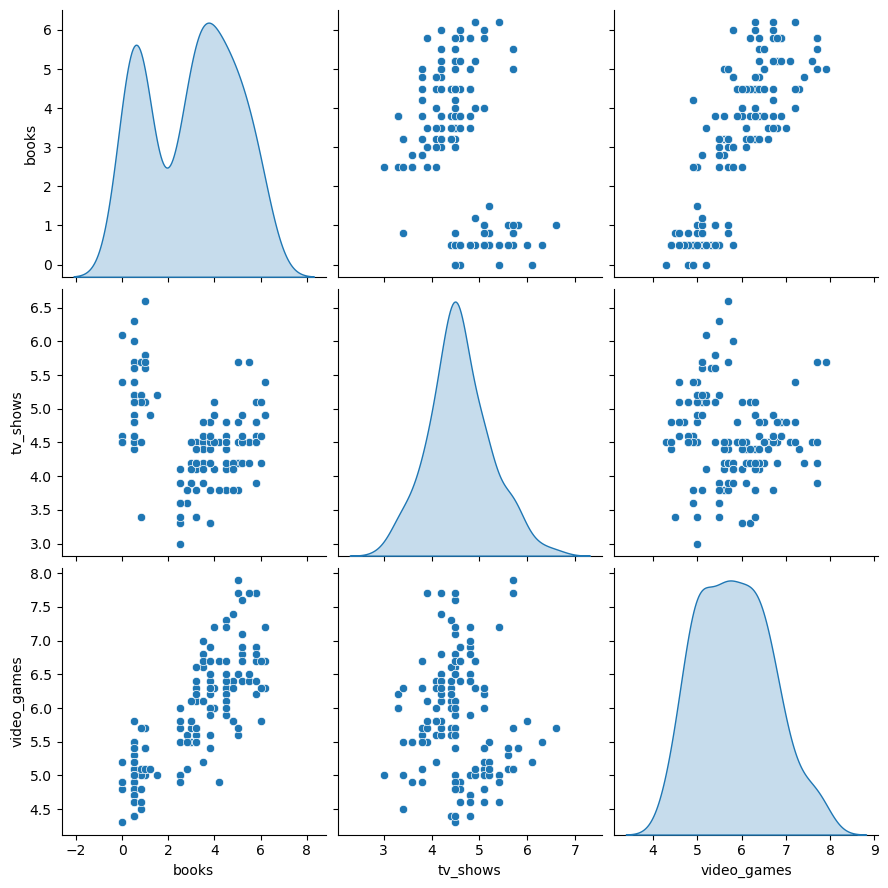

In [21]:
sns.pairplot(X, diag_kind='kde', height=3);

In [22]:
X.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [23]:
df.head()

,name,books,tv_shows,video_games,anomaly_scores,anomaly
0,Aaliyah,0.5,4.6,4.9,0.199570,1
1,Abigail,0.0,4.5,4.8,0.117345,1
2,Addison,0.5,4.5,5.0,0.188466,1
3,Adeline,3.5,4.5,6.6,0.191427,1
4,Alana,2.8,3.8,5.6,0.174206,1


In [25]:
df.iloc[:,1:].drop(columns=['anomaly_scores'])

,books,tv_shows,video_games,anomaly
0,0.5,4.6,4.9,1
1,0.0,4.5,4.8,1
2,0.5,4.5,5.0,1
3,3.5,4.5,6.6,1
4,2.8,3.8,5.6,1
...,...,...,...,...
145,5.2,4.6,6.9,1
146,6.0,4.6,6.7,1
147,5.5,5.7,7.7,1
148,0.0,6.1,5.2,1


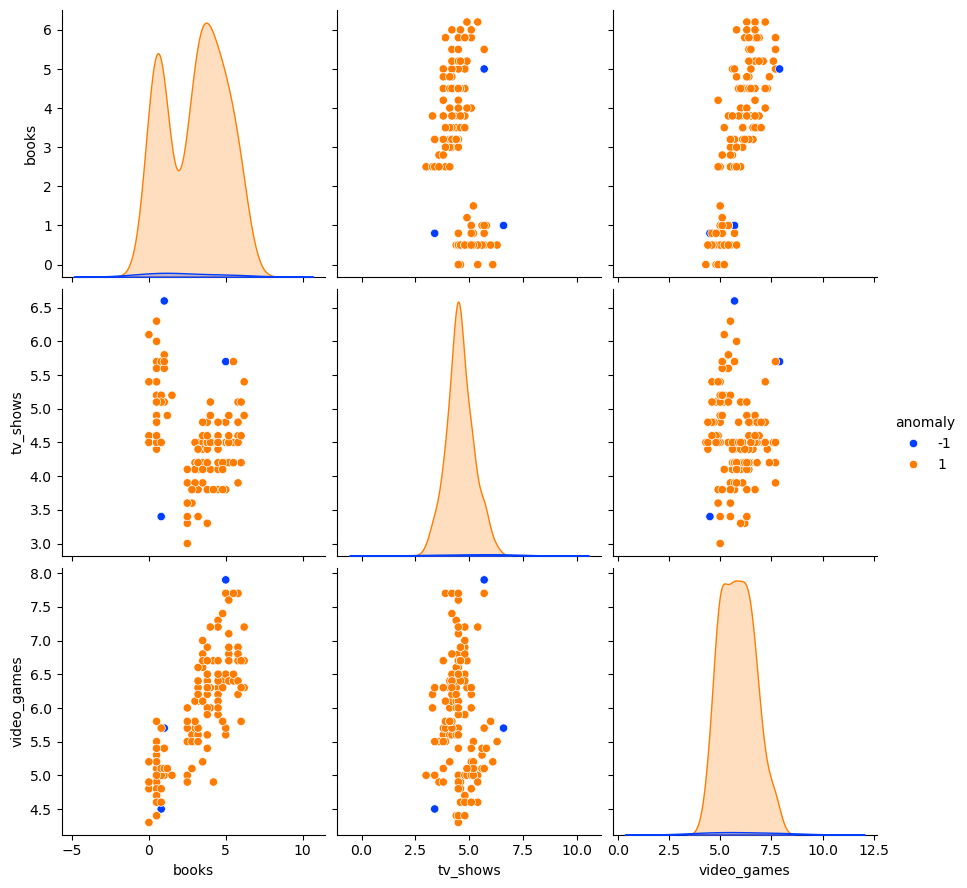

In [28]:
sns.pairplot(df.iloc[:,1:].drop(columns=['anomaly_scores']), 
             hue='anomaly', # Color depends on anomaly column
             palette='bright',# Default colors are horrible so we set the colors
             diag_kind='kde', 
             height=3);